OsloMet. BYGG2100. 2024. F. Haugen (finn.haugen@oslomet.no)

<h1 style="color:black;">FOR-LØKKER og WHILE-LØKKER</h1>

<h1 style="color:darkred;">Hvorfor løkker?</h1>

<h2 style="color:darkblue;">Løkker er nyttige i mange sammenhenger:</h2>

* Beregninger eller andre operasjoner som skal utføres om igjen og om igjen og om igjen - dette kan gjøres automatisk med løkker!
* Beregninger eller andre operasjoner på elementer i arrayer og lister - element for element!
* Optimering, der programmet søker seg fram til en stadig bedre løsning på et matematisk problem - f.eks. å finne minimum av en funksjon.
* Simulering av dynamiske systemer, der programmet regner ut stadig nye "framtidige" verdier for f.eks. temperatur, nivå, posisjon, fart, o.a.
* m.m.


<h1 style="color:darkred;">For-løkker</h1>

Antall iterasjoner er forhåndsbestemt:


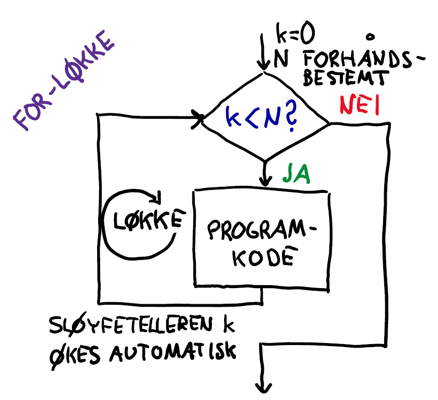

Hvordan lese array-elementer i en for-løkke:

<h2 style="color:darkblue;">Hvordan <em>lese</em> verdien av elementer i en array?</h2>

<h3 style="color:darkgreen;">Metode 1: Bruke løkkens iterasjonsnummer <em>eksplisitt</em></h3>

In [57]:
import numpy as np

A = np.array([5, 10, 15])

for k in range(0, len(A)):
    E = A[k]
    print('k (iterasjonsnummer) =', k)
    print('E =', E)
    print('-----------------')

print('Dette er en kodelinje etter for-løkken.')


k (iterasjonsnummer) = 0
E = 5
-----------------
k (iterasjonsnummer) = 1
E = 10
-----------------
k (iterasjonsnummer) = 2
E = 15
-----------------
Dette er en kodelinje etter for-løkken.


Spørsmål: Hva er iterasjonsnummeret (k) etter at løkken har kjørt ferdig? Hvor mange ganger har da løkken iterert?

<h3 style="color:darkgreen;">Metode 2: Bruke løkkens iterasjonsnummer <em>implisitt</em></h3>

In [55]:
import numpy as np

A = np.array([5, 10, 15])

for E in A:
    print('E =', E)

print('Dette er en kodelinje etter for-løkken.')


E = 5
E = 10
E = 15
Dette er en kodelinje etter for-løkken.


Merk at programkoden <em>ikke</em> inneholder (viser) løkkens iterasjonsnummer!

<h2 style="color:darkviolet;">Vi koder sammen fra grunnen av:</h2>

Din inntekt som ekstrajobb som programutvikler denne uken (man-fre) er kr 3000, 1500, 800, 2000, 400. Lag et program som vha. en for-løkke beregner den totale inntekten.

In [22]:
# Vi skriver koden i denne cellen:

inntektsliste = [3000, 1500, 800, 2000, 400]
total_inntekt = 0

for dagsinntekt in inntektsliste:
    total_inntekt += dagsinntekt

print("Den totale ukesinntekten er", total_inntekt)


Den totale ukesinntekten er 7700


En alternativ løkkefri og mer effektiv løsning med np.sum:

In [26]:
# Vi skriver koden i denne cellen:

import numpy as np

inntektsliste = [3000, 1500, 800, 2000, 400]
total_inntekt = np.sum(inntektsliste)
print("Den totale ukesinntekten er", total_inntekt)


Den totale ukesinntekten er 7700


<h2 style="color:darkgreen;">Hvordan <em>skrive</em> en verdi til et element i en array?</h2>

In [28]:
import numpy as np

A = np.zeros(10)

for k in range(0, len(A)):
    A[k] = 10*k

print('A =', A)


A = [ 0. 10. 20. 30. 40. 50. 60. 70. 80. 90.]


<h2 style="color:darkblue;">Nøstede for-løkker: Løkker inne i løkker</h2>

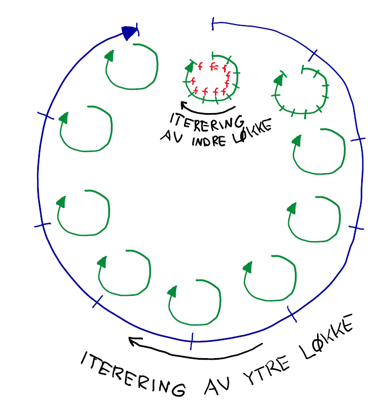

In [30]:
import numpy as np

M = np.array([[11, 12, 13],
              [21, 22, 23]])

(m, n) = np.shape(M)

for i in range(0, m):  # Ytre løkke som går igjennom alle radene
    for j in range(0, n):  # Indre løkke som for hver rad går igjennom alle kolonnene
        E = M[i,j]
        print(E)


11
12
13
21
22
23


<h3 style="color:darkgreen;">Eksempel: Karakterberegning</h3>

Vi legger programmet nedenfor inn i en kodecelle i Notebook og kjører det.

https://techteach.no/python/files/karakterberegning.py

In [32]:
# -*- coding: utf-8 -*-
"""
Created on Thu Nov 16 12:02:09 2023

@author: finnh
"""

#%% Import av pakker

import numpy as np

#%% Eksamensresultatene (2D-array)

exam_results = np.array(
    [['oppgnr', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'],
    ['fasit', 'c', 'a', 'b', 'a', 'b', 'd', 'a', 'c', 'b', 'd'],
    ['100', 'a', 'b', 'a', 'd', 'b', 'a', 'a', 'c', 'a', 'c'],
    ['101', 'c', 'a', 'b', 'a', 'b', 'd', 'a', 'c', 'b', 'd'],
    ['102', 'c', 'b', 'b', 'd', 'b', 'a', 'a', 'c', 'b', 'd'],
    ['103', 'c', 'b', 'b', 'd', 'b', 'd', 'a', 'c', 'b', 'd'],
    ['104', 'c', 'a', 'd', 'a', 'b', 'a', 'c', 'c', 'b', 'd']])

solution = exam_results[1, 1:]

#%% Beregning av poeng og karakter med noestede loekker

n_problems = len(exam_results[0,:]) - 1
n_candidates = len(exam_results[:,0]) - 2

# Poenggrense for bestaatt:
points_pass = 4

# Ytre loekke: Iterering gjennom alle kandidatene:
for j in range(0, n_candidates):
    
    cand_number = exam_results[j+2, 0]
    cand_answers = exam_results[j+2,1:]
    
    # Indre loekke: Iterering gjennom alle oppgavene:
    cand_points = 0

    for k in range(0, n_problems):
        
        if (cand_answers[k] == solution[k]):
            cand_points += 1
            
    # Beregning av karakter for kandidaten:
    if cand_points >= points_pass:
        cand_grade = 'Bestaatt'
    else:
        cand_grade = 'Ikke bestaatt'
    
    # Poeng og karakter for kandidaten i naavaerende iterasjon:
    print('Kandidat nummer', cand_number, '\b:')
    print('Poeng:', cand_points)
    print('Karakter:', cand_grade)
    print('---------------------------------------')

Kandidat nummer 100:
Poeng: 3
Karakter: Ikke bestaatt
---------------------------------------
Kandidat nummer 101:
Poeng: 10
Karakter: Bestaatt
---------------------------------------
Kandidat nummer 102:
Poeng: 7
Karakter: Bestaatt
---------------------------------------
Kandidat nummer 103:
Poeng: 8
Karakter: Bestaatt
---------------------------------------
Kandidat nummer 104:
Poeng: 7
Karakter: Bestaatt
---------------------------------------


<h1 style="color:darkred;">Preallokering av arrayer</h1>

To alternativer for å lage arrayer:
* Utvidelse av eksisterende array med append-funksjonen (ev. extend-funksjonen)
* Preallokering av arrayen

Se figuren nedenfor.

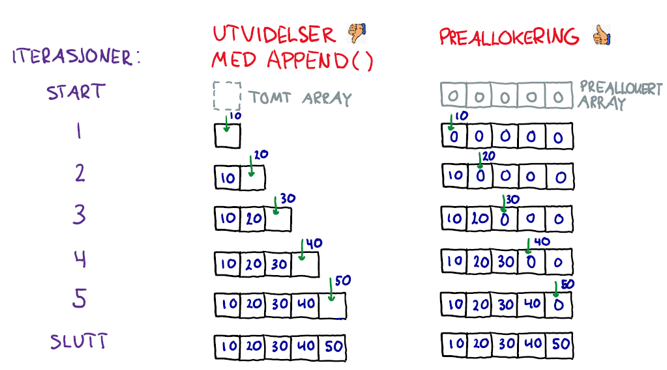

Nedenfor er et eksempel der begge metodene er implementert. (Vi legger programmet inn i en kodecelle og kjører det.)

http://techteach.no/python/files/prog_tid_preallokering_array.py

In [35]:
# %% Import

import numpy as np
import time

# %% Initialisering

N = 100000
dyn_array = np.array([])
preallok_array = np.zeros(N)

# %% Append:

tic = time.time()

for k in range(0, N):
    dyn_array = np.append(dyn_array, 10*k)

toc = time.time()
t_elapsed_append = toc - tic

# %% Preallok:

tic = time.time()

for k in range(0, N):
    preallok_array[k] = 10*k

toc = time.time()
t_elapsed_preallok = toc - tic

# %% Sammenlikning:

forhold_append_preallok = \
    t_elapsed_append/t_elapsed_preallok

print('------------------------------------------------')
print('N =', N)
print('t_elapsed_append [s] = ',t_elapsed_append)
print('t_elapsed_preallok [s] =', t_elapsed_preallok)
print('t_elapsed_append/t_elapsed_preallok =',
      forhold_append_preallok)
print('------------------------------------------------')

------------------------------------------------
N = 100000
t_elapsed_append [s] =  2.4154982566833496
t_elapsed_preallok [s] = 0.0191042423248291
t_elapsed_append/t_elapsed_preallok = 126.43779405708295
------------------------------------------------


Spørsmål: Sparer vi kjøretid med preallokering?

<h1 style="color:darkred;">While-løkker</h1>

* Iterasjonene av koden inne i løkken gjentas så lenge løkkens fortsett-betingelse har verdi True.
* Verdien av fortsett-betingelsen bestemmes av koden inne i løkken.
* Antall iterasjoner er vanligvis ikke kjent på forhånd. (Hadde vi visst antall iterasjoner, kunne vi like gjerne ha brukt en for-løkke.)

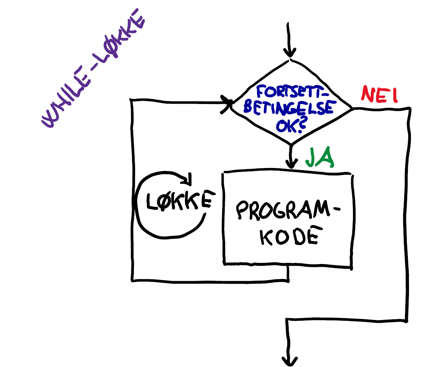

<h3 style="color:darkgreen;">Eksempel: Løse likning med while-løkke</h3>

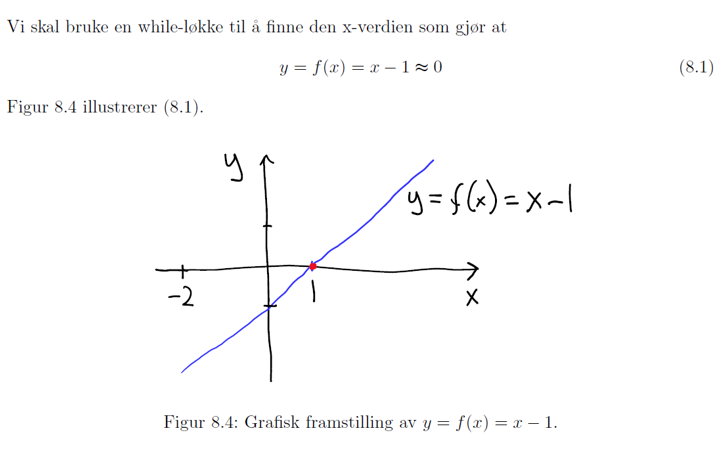

Løsning: https://techteach.no/python/files/while_intro.py

In [53]:
def f(x):
    return x - 1

x = -2
y = f(x)
k = 0

while (y < 0):
    x += 0.01
    y = f(x)
    k += 1

print(f'x = {x:.2e}')
print(f'y = {y:.2e}')
print('k =', k)

x = 1.00e+00
y = 2.22e-15
k = 300


<h2 style="color:darkviolet;">Vi koder sammen fra grunnen av:</h2>

Norges befolkning ved utgangen av år 2023 var 5.550.203. Anta årlig befolkningsvekst på 0,8 %, som er en typisk vekst de siste tiårene. Lag et program med while-løkke som beregner ved hvilket år (årets utgang) befolkningen vil være større enn 6 millioner.

In [51]:
# Vi skriver koden i denne cellen:

n_2023 = 5550203
r = 0.008
n1 = 6000000
n = n_2023

k = 0

while n <= n1:
    n += r*n
    k += 1
    
print(f'Befolkning når den er mer enn 6.000.000 = {n:.0f}')
print('Dette skjer i år ', 2023 + k)


Befolkning når den er mer enn 6.000.000 = 6010550
Dette skjer i år  2033
